In [31]:
from autocluster import AutoCluster
from algorithms import algorithms
from build_config_space import build_config_space
from utils.clusterutils import ClusterUtils
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score
from sklearn import datasets

import numpy as np

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
varied, blobs, no_structure, noisy_circles, noisy_moons, aniso = ClusterUtils.generate_sample_data(1500)

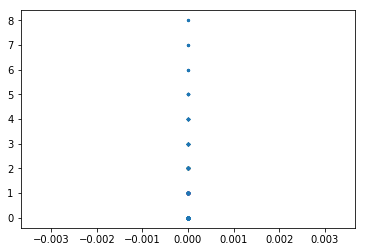

In [33]:
# X = blobs[0]
# X = datasets.load_iris().data
X = datasets.load_digits().data
ClusterUtils.visualize_sample_data(X)

### Test with Parallel Runs

In [34]:
autocluster = AutoCluster()
smac_obj, opt_result = autocluster.fit(X, cluster_alg_ls=['MiniBatchKMeans'], 
                                       dim_reduction_alg_ls=['TSNE'],
                                       n_evaluations=100, seed=27, run_obj='quality', cutoff_time=10, 
                                       shared_model=True, n_parallel_runs = 3,
                                       evaluator=lambda X, y_pred: float('inf') if len(set(y_pred)) == 1 \
                                                else -1 * silhouette_score(X, y_pred)  
#                                                    else davies_bouldin_score(X, y_pred)
                                      )

Configuration space object:
  Hyperparameters:
    batch_size___MiniBatchKMeans, Type: UniformInteger, Range: [10, 1000], Default: 100
    clustering_choice, Type: Categorical, Choices: {MiniBatchKMeans}, Default: MiniBatchKMeans
    dim_reduction_choice, Type: Categorical, Choices: {TSNE}, Default: TSNE
    early_exaggeration___TSNE, Type: UniformFloat, Range: [5.0, 20.0], Default: 12.0
    n_clusters___MiniBatchKMeans, Type: UniformInteger, Range: [1, 15], Default: 10
    n_components___TSNE, Type: Ordinal, Sequence: {2, 3}, Default: 2
    perplexity___TSNE, Type: UniformFloat, Range: [1.0, 300.0], Default: 30.0
    random_state___TSNE, Type: Ordinal, Sequence: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}, Default: 0
  Conditions:
    batch_size___MiniBatchKMeans | clustering_choice in {'MiniBatchKMeans'}
    early_exaggeration___TSNE | dim_reduction_choice in {'TSNE'}
    n_clusters___MiniBatchKMeans | clustering_choice in {'MiniBatchKMeans'}
    n_components___TSNE | dim_reduction_choice in {'TS

Fitting configuration: {'n_clusters___MiniBatchKMeans': 1, 'n_components___TSNE': 2, 'early_exaggeration___TSNE': 12.85786874551579, 'perplexity___TSNE': 10.697311832706445, 'dim_reduction_choice': 'TSNE', 'clustering_choice': 'MiniBatchKMeans', 'batch_size___MiniBatchKMeans': 455}


Fitting configuration: {'n_clusters___MiniBatchKMeans': 13, 'n_components___TSNE': 3, 'early_exaggeration___TSNE': 18.522160545836407, 'perplexity___TSNE': 1.4007371729789064, 'dim_reduction_choice': 'TSNE', 'clustering_choice': 'MiniBatchKMeans', 'batch_size___MiniBatchKMeans': 90}
Fitting configuration: {'n_clusters___MiniBatchKMeans': 5, 'n_components___TSNE': 3, 'early_exaggeration___TSNE': 6.4369875755992885, 'random_state___TSNE': 7, 'perplexity___TSNE': 223.96426925902784, 'dim_reduction_choice': 'TSNE', 'clustering_choice': 'MiniBatchKMeans', 'batch_size___MiniBatchKMeans': 567}
Fitting configuration: {'n_clusters___MiniBatchKMeans': 15, 'n_components___TSNE': 3, 'early_exaggeration___TSNE': 18.266877966483214, 'random_state___TSNE': 2, 'perplexity___TSNE': 223.6310722009681, 'dim_reduction_choice': 'TSNE', 'clustering_choice': 'MiniBatchKMeans', 'batch_size___MiniBatchKMeans': 95}
Fitting configuration: {'n_clusters___MiniBatchKMeans': 10, 'n_components___TSNE': 2, 'early_exag

In [35]:
opt_result

Configuration:
  batch_size___MiniBatchKMeans, Value: 100
  clustering_choice, Value: 'MiniBatchKMeans'
  dim_reduction_choice, Value: 'TSNE'
  early_exaggeration___TSNE, Value: 12.0
  n_clusters___MiniBatchKMeans, Value: 10
  n_components___TSNE, Value: 2
  perplexity___TSNE, Value: 30.0
  random_state___TSNE, Value: 0

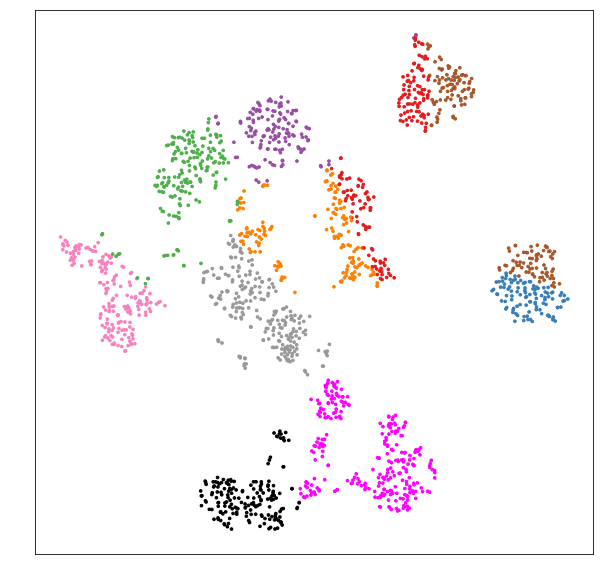

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [36]:
predictions = autocluster.predict(X)
np.unique(predictions)

In [22]:
smac_obj.get_trajectory()

[TrajEntry(train_perf=2147483648, incumbent_id=1, incumbent=Configuration:
   batch_size___MiniBatchKMeans, Value: 100
   clustering_choice, Value: 'MiniBatchKMeans'
   dim_reduction_choice, Value: 'TSNE'
   early_exaggeration___TSNE, Value: 12.0
   n_clusters___MiniBatchKMeans, Value: 10
   n_components___TSNE, Value: 2
   perplexity___TSNE, Value: 30.0
 , ta_runs=0, ta_time_used=0, wallclock_time=0.00013494491577148438),
 TrajEntry(train_perf=-0.588287889957428, incumbent_id=1, incumbent=Configuration:
   batch_size___MiniBatchKMeans, Value: 100
   clustering_choice, Value: 'MiniBatchKMeans'
   dim_reduction_choice, Value: 'TSNE'
   early_exaggeration___TSNE, Value: 12.0
   n_clusters___MiniBatchKMeans, Value: 10
   n_components___TSNE, Value: 2
   perplexity___TSNE, Value: 30.0
 , ta_runs=1, ta_time_used=9.781363487243652, wallclock_time=9.79154372215271),
 TrajEntry(train_perf=-0.5912327766418457, incumbent_id=2, incumbent=Configuration:
   batch_size___MiniBatchKMeans, Value: 154


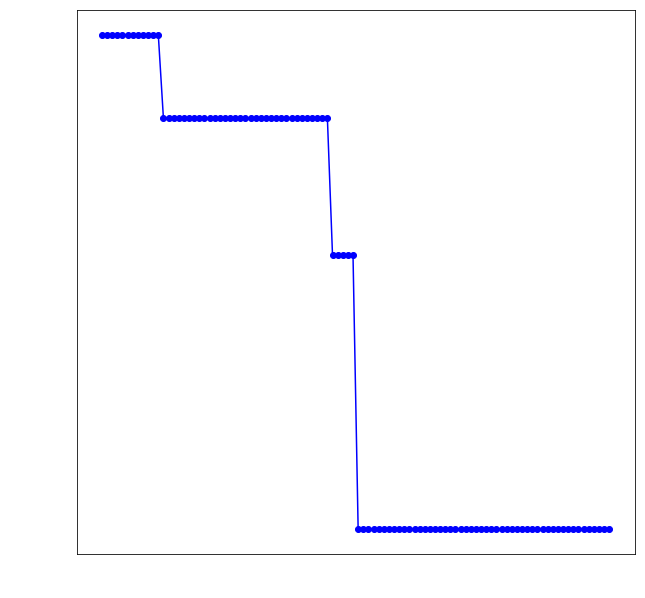

In [23]:
autocluster.plot_convergence()